In [1]:
from pprint import pprint
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import WrappedDiro2C, plot_diro2c_2d, get_pruned_trees, eval_diro2c, get_generated_data
from surrogate_tree import get_feature_importances, plot_feature_importances, plot_surrogate_tree,\
                           extract_rules, print_rules, plot_rules_of_tree_for_class
from util import RuleClassifier, evaluate_counterfactual_fidelity, get_complexity, group_metrics

In [2]:
with open('data/task.pickle', 'rb') as f:
    clf_a, clf_b, X, y, feature_names, feature_precisions = pickle.load(f)

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

# Explanations

In [5]:
%%time
for class_name in comparer.class_names:
    print(class_name)
    explainer = WrappedDiro2C(X, comparer, class_name)
    explanation = explainer.generate_global_explanation()
    with open(f'explanations/diro2c.{class_name}.pickle', 'wb') as f:
        pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

(0, 0)
(0, 1)
(1, 0)
(1, 1)
CPU times: user 6min 21s, sys: 3.38 s, total: 6min 25s
Wall time: 6min 54s


## $(0,1)$

In [5]:
focus_class = '(0, 1)'
y_true = comparer.class_names[mclass_diff] == focus_class

In [6]:
with open(f'explanations/diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

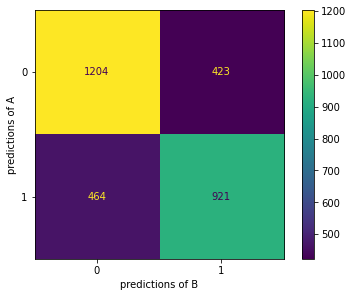

In [7]:
comparer.plot_confusion_matrix(get_generated_data(explanation)[0])
plt.savefig('figures/running-diro2c-cf-01.pdf')

In [8]:
%%time
trees = get_pruned_trees(explanation)
tree_it = iter(trees)
len(trees)

CPU times: user 11.5 ms, sys: 2.81 ms, total: 14.3 ms
Wall time: 14.6 ms


3

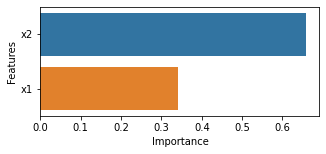

In [9]:
feature_importances, feature_order = get_feature_importances(trees[-1])
plot_feature_importances(feature_names, feature_importances, feature_order)

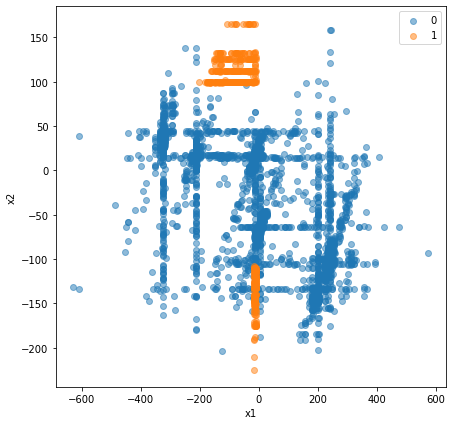

In [10]:
plot_diro2c_2d(explanation, 'x1', 'x2')

### 2 Leafs

In [11]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.032165196189669086, 1, 2)

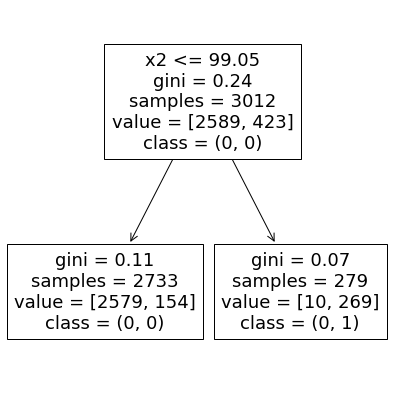

In [12]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [13]:
constraints, rules, class_occurences, labels, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. x2 > 99.1 => (0, 1) [10, 269]


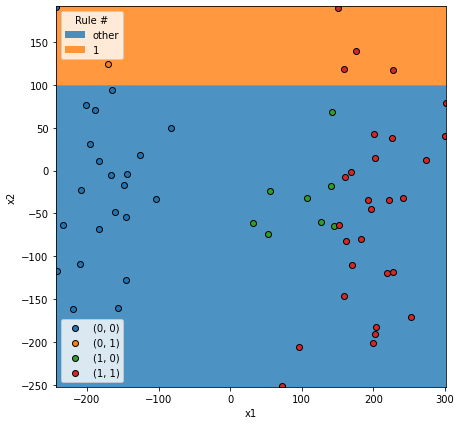

In [14]:
plot_rules_of_tree_for_class(tree, tree.classes_, tree.classes_[1:2], X, mclass_diff, comparer.class_names, feature_names, rule_order)

### 5 Leafs

In [15]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.0032010548011062083, 4, 5)

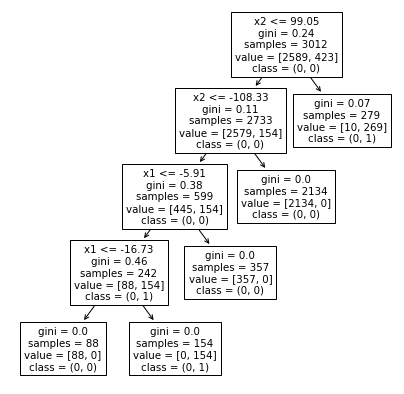

In [16]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [17]:
constraints, rules, class_occurences, labels, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. x2 > 99.1 => (0, 1) [10, 269]
2. -16.7 < x1 <= -5.9 and x2 <= -108.3 => (0, 1) [0, 154]


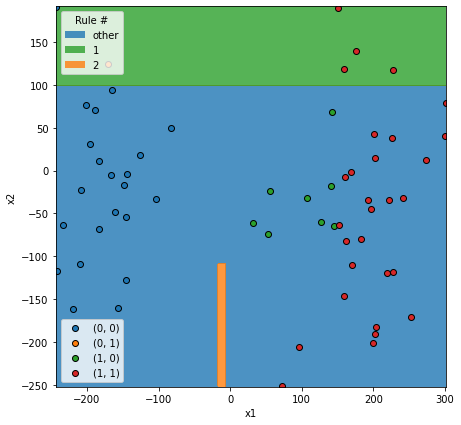

In [19]:
plot_rules_of_tree_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names, rule_order)

### 8 Leafs

In [20]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.0, 4, 7)

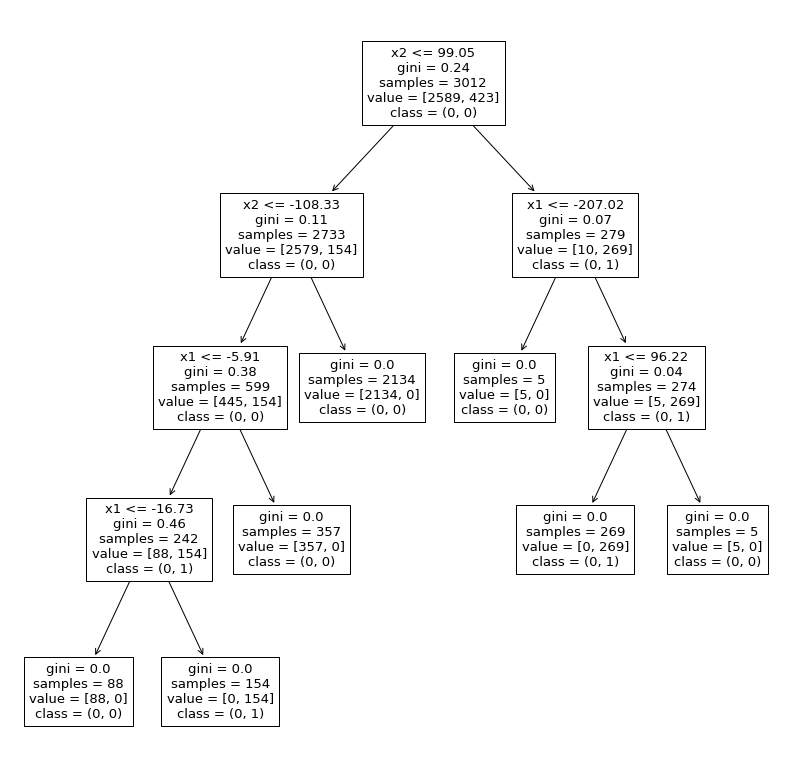

In [21]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [22]:
constraints, rules, class_occurences, labels, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -207.0 < x1 <= 96.2 and x2 > 99.1 => (0, 1) [0, 269]
2. -16.7 < x1 <= -5.9 and x2 <= -108.3 => (0, 1) [0, 154]


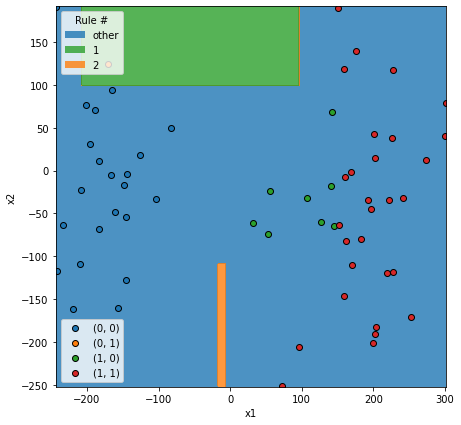

In [23]:
plot_rules_of_tree_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## $(1,0)$

In [24]:
focus_class = '(1, 0)'
y_true = comparer.class_names[mclass_diff] == focus_class

In [25]:
with open(f'explanations/diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

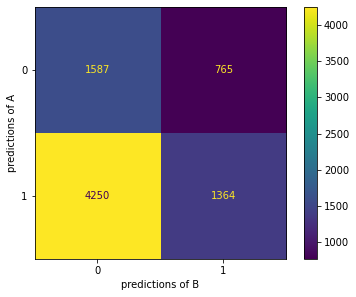

In [26]:
comparer.plot_confusion_matrix(get_generated_data(explanation)[0])
plt.savefig('figures/running-diro2c-cf-10.pdf')

In [27]:
%%time
trees = get_pruned_trees(explanation)
tree_it = iter(trees)
len(trees)

CPU times: user 32.4 ms, sys: 2.6 ms, total: 35 ms
Wall time: 36 ms


4

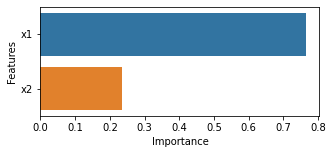

In [28]:
feature_importances, feature_order = get_feature_importances(trees[-1])
plot_feature_importances(feature_names, feature_importances, feature_order)

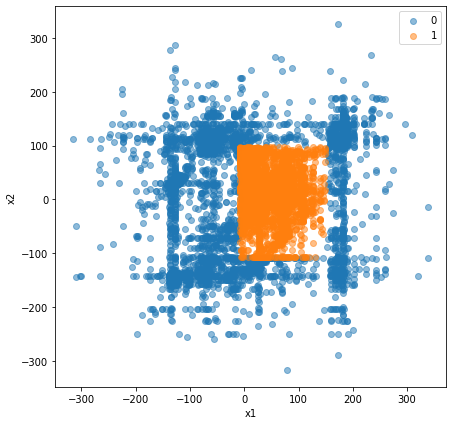

In [29]:
plot_diro2c_2d(explanation, 'x1', 'x2')

### 2 Leafs

In [30]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.1427293550844675, 1, 2)

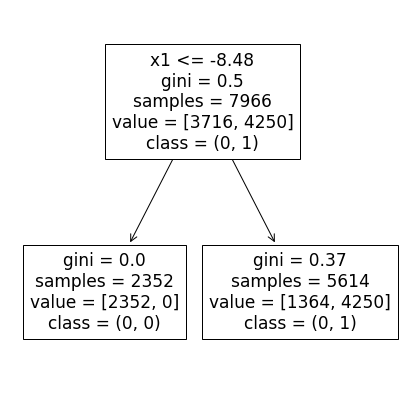

In [31]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [32]:
constraints, rules, class_occurences, labels, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. x1 > -8.5 => (0, 1) [1364, 4250]


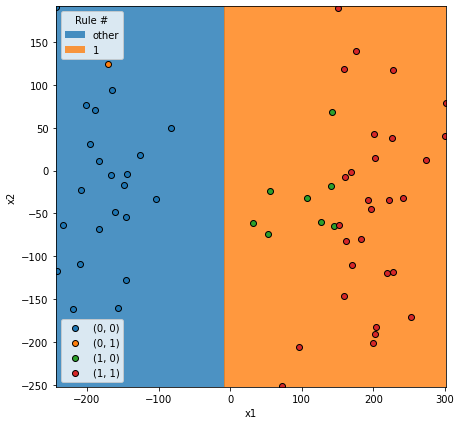

In [33]:
plot_rules_of_tree_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names, rule_order)

### 3 Leafs

In [34]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.08061423627602936, 2, 3)

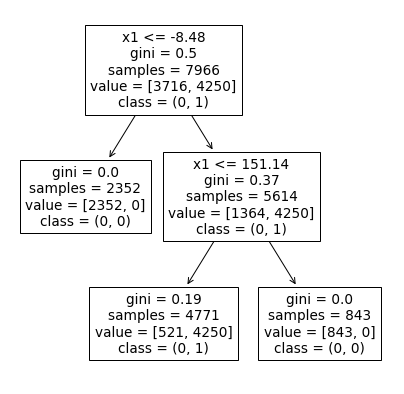

In [35]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [36]:
constraints, rules, class_occurences, labels, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -8.5 < x1 <= 151.1 => (0, 1) [521, 4250]


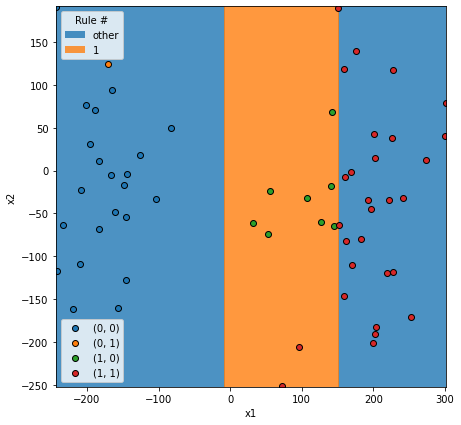

In [37]:
plot_rules_of_tree_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names, rule_order)

### 4 Leafs

In [38]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.035907495441346526, 3, 4)

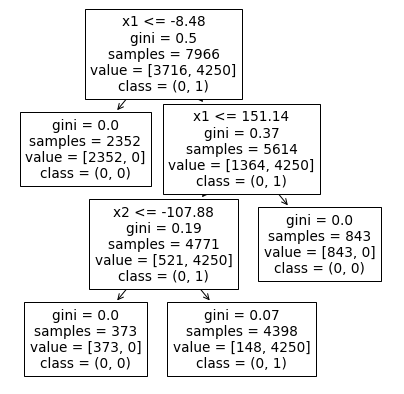

In [39]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [40]:
constraints, rules, class_occurences, labels, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -8.5 < x1 <= 151.1 and x2 > -107.9 => (0, 1) [148, 4250]


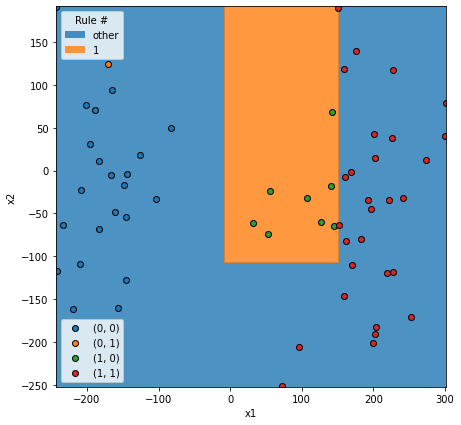

In [41]:
plot_rules_of_tree_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names, rule_order)

### 5 Leafs

In [42]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.0, 4, 5)

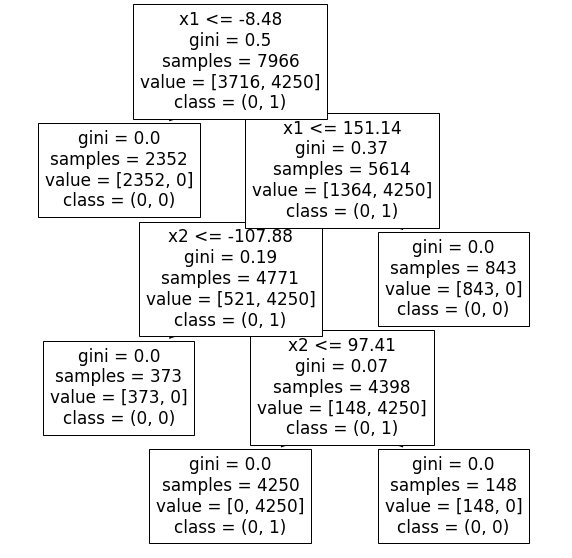

In [43]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(10, 10))

In [44]:
constraints, rules, class_occurences, labels, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -8.5 < x1 <= 151.1 and -107.9 < x2 <= 97.4 => (0, 1) [0, 4250]


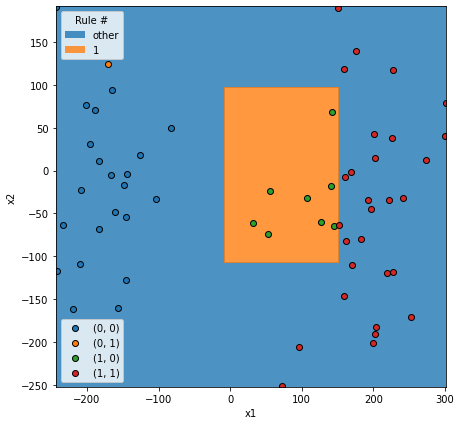

In [45]:
plot_rules_of_tree_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names, rule_order)

# Evaluation

In [46]:
with open('data/test.pickle', 'rb') as f:
    X_test, y_test = pickle.load(f)

In [47]:
explanations_per_class = {}
for class_name in comparer.class_names:
    with open(f'explanations/diro2c.{class_name}.pickle', 'rb') as f:
        explanations_per_class[class_name] = pickle.load(f)

In [48]:
from diro2c_wrapper import get_surrogate_tree
dict([(class_name, get_surrogate_tree(explanation).get_depth()) for class_name, explanation in explanations_per_class.items()])

{'(0, 0)': 4, '(0, 1)': 4, '(1, 0)': 4, '(1, 1)': 5}

In [49]:
metrics = eval_diro2c(explanations_per_class, X_test, y_test, comparer.class_names)
metrics

,Precision,Recall,F1 Score,Support,Label,Leafs,Alpha,Rules,Constraints
1,0.860346,0.994815,0.922707,4050.0,"(0, 0)",2.0,0.040361,1.0,1.0
1,0.990844,0.988642,0.989742,4050.0,"(0, 0)",3.0,0.013864,1.0,2.0
1,0.990896,0.994321,0.992605,4050.0,"(0, 0)",4.0,0.002270,2.0,4.0
1,0.994321,0.994321,0.994321,4050.0,"(0, 0)",6.0,0.000000,3.0,8.0
1,0.449010,0.925870,0.604743,661.0,"(0, 1)",2.0,0.032165,1.0,1.0
1,0.458392,0.983359,0.625301,661.0,"(0, 1)",5.0,0.003201,2.0,4.0
1,0.557940,0.983359,0.711939,661.0,"(0, 1)",7.0,0.000000,2.0,6.0
1,0.615894,0.998773,0.761938,3259.0,"(1, 0)",2.0,0.142729,1.0,1.0
1,0.700753,0.998773,0.823634,3259.0,"(1, 0)",3.0,0.080614,1.0,2.0
1,0.828833,0.998466,0.905776,3259.0,"(1, 0)",4.0,0.035907,1.0,3.0


In [50]:
grouped_metrics, constraints = group_metrics(metrics, by='Alpha')

In [51]:
with open('data/fidelity-diro2c.pickle', 'wb') as f:
    pickle.dump((grouped_metrics, constraints), f)

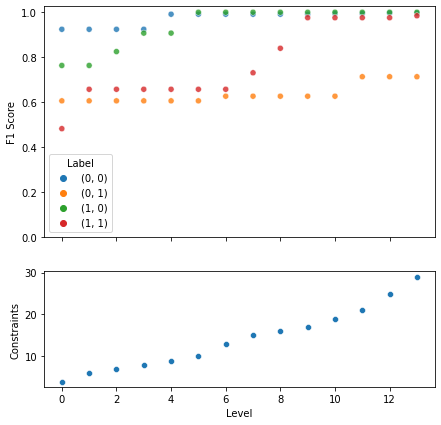

In [52]:
fig, axs = plt.subplots(nrows=2, figsize=(7, 7), sharex='all', gridspec_kw={'height_ratios': [2,1]})
sns.scatterplot(data=grouped_metrics, x='Level', y='F1 Score', hue='Label', alpha=0.8, ax=axs[0])
sns.scatterplot(data=constraints, ax=axs[1])
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].set_ylim((0, 1.025))
plt.savefig('figures/running-diro2c-fidelity.pdf')

In [53]:
grouped_metrics

Label  Precision    Recall  F1 Score  Support  Leafs     Alpha  \
Level                                                                      
0     0  (0, 0)   0.860346  0.994815  0.922707   4050.0    2.0  0.040361   
      1  (0, 1)   0.449010  0.925870  0.604743    661.0    2.0  0.032165   
      2  (1, 0)   0.615894  0.998773  0.761938   3259.0    2.0  0.142729   
      3  (1, 1)   1.000000  0.316749  0.481107   2030.0    2.0  0.193601   
1     0  (0, 0)   0.860346  0.994815  0.922707   4050.0    2.0  0.040361   
      1  (0, 1)   0.449010  0.925870  0.604743    661.0    2.0  0.032165   
      2  (1, 0)   0.615894  0.998773  0.761938   3259.0    2.0  0.142729   
      3  (1, 1)   0.669918  0.642857  0.656109   2030.0    3.0  0.022796   
2     0  (0, 0)   0.860346  0.994815  0.922707   4050.0    2.0  0.040361   
      1  (0, 1)   0.449010  0.925870  0.604743    661.0    2.0  0.032165   
      2  (1, 0)   0.700753  0.998773  0.823634   3259.0    3.0  0.080614   
      3  (1, 1)   0.669918  0.642857  0.656109   2030.0    3.0  0.022796   
3     0  (0, 0)   0.860346  0.994815  0.922707   4050.0    2.0  0.040361   
      1  (0, 1)   0.449010  0.925870  0.604743    661.0    2.0  0.032165   
      2  (1, 0)   0.828833  0.998466  0.905776   3259.0    4.0  0.035907   
      3  (1, 1)   0.669918  0.642857  0.656109   2030.0    3.0  0.022796   
4     0  (0, 0)   0.990844  0.988642  0.989742   4050.0    3.0  0.013864   
      1  (0, 1)   0.449010  0.925870  0.604743    661.0    2.0  0.032165   
      2  (1, 0)   0.828833  0.998466  0.905776   3259.0    4.0  0.035907   
      3  (1, 1)   0.669918  0.642857  0.656109   2030.0    3.0  0.022796   
5     0  (0, 0)   0.990844  0.988642  0.989742   4050.0    3.0  0.013864   
      1  (0, 1)   0.449010  0.925870  0.604743    661.0    2.0  0.032165   
      2  (1, 0)   0.998772  0.998159  0.998465   3259.0    5.0  0.000000   
      3  (1, 1)   0.669918  0.642857  0.656109   2030.0    3.0  0.022796   
6     0  (0, 0)   0.990844  0.988642  0.989742   4050.0    3.0  0.013864   
      1  (0, 1)   0.458392  0.983359  0.625301    661.0    5.0  0.003201   
      2  (1, 0)   0.998772  0.998159  0.998465   3259.0    5.0  0.000000   
      3  (1, 1)   0.669918  0.642857  0.656109   2030.0    3.0  0.022796   
7     0  (0, 0)   0.990844  0.988642  0.989742   4050.0    3.0  0.013864   
      1  (0, 1)   0.458392  0.983359  0.625301    661.0    5.0  0.003201   
      2  (1, 0)   0.998772  0.998159  0.998465   3259.0    5.0  0.000000   
      3  (1, 1)   0.591605  0.951232  0.729505   2030.0    4.0  0.021225   
8     0  (0, 0)   0.990844  0.988642  0.989742   4050.0    3.0  0.013864   
      1  (0, 1)   0.458392  0.983359  0.625301    661.0    5.0  0.003201   
      2  (1, 0)   0.998772  0.998159  0.998465   3259.0    5.0  0.000000   
      3  (1, 1)   0.750000  0.950246  0.838331   2030.0    5.0  0.019084   
9     0  (0, 0)   0.990844  0.988642  0.989742   4050.0    3.0  0.013864   
      1  (0, 1)   0.458392  0.983359  0.625301    661.0    5.0  0.003201   
      2  (1, 0)   0.998772  0.998159  0.998465   3259.0    5.0  0.000000   
      3  (1, 1)   0.999482  0.950246  0.974242   2030.0    6.0  0.000127   
10    0  (0, 0)   0.990896  0.994321  0.992605   4050.0    4.0  0.002270   
      1  (0, 1)   0.458392  0.983359  0.625301    661.0    5.0  0.003201   
      2  (1, 0)   0.998772  0.998159  0.998465   3259.0    5.0  0.000000   
      3  (1, 1)   0.999482  0.950246  0.974242   2030.0    6.0  0.000127   
11    0  (0, 0)   0.990896  0.994321  0.992605   4050.0    4.0  0.002270   
      1  (0, 1)   0.557940  0.983359  0.711939    661.0    7.0  0.000000   
      2  (1, 0)   0.998772  0.998159  0.998465   3259.0    5.0  0.000000   
      3  (1, 1)   0.999482  0.950246  0.974242   2030.0    6.0  0.000127   
12    0  (0, 0)   0.994321  0.994321  0.994321   4050.0    6.0  0.000000   
      1  (0, 1)   0.557940  0.983359  0.711939    661.0    7.0  0.000000   
      2  (1, 0)   0.998772  0.998159  0.998465   3259.0   

In [54]:
constraints

Level
0      4.0
1      6.0
2      7.0
3      8.0
4      9.0
5     10.0
6     13.0
7     15.0
8     16.0
9     17.0
10    19.0
11    21.0
12    25.0
13    29.0
Name: Constraints, dtype: float64

# Additional Material

In [55]:
focus_class = '(0, 1)'
tree = get_pruned_trees(explanations_per_class[focus_class])[-1]

In [57]:
constraints, rules, class_occurences, labels, rule_order =\
    extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions, latex=True)

In [58]:
for rule, label in zip(rules, labels):
    print(f'\item if ${rule}$, then ${focus_class}$')

\item if $-207.0 < \mathit{x_1} \leq 96.2 \land \mathit{x_2} > 99.1$, then $(0, 1)$
\item if $-16.7 < \mathit{x_1} \leq -5.9 \land \mathit{x_2} \leq -108.3$, then $(0, 1)$


In [59]:
constraints[0] - [[-203.77635193, -8.54483223], [97.53022003, np.nan]]

array([[ -3.23979187, 104.76637888],
       [  1.51991272,          nan]])

In [60]:
constraints[1] - [[-16.3683548, -8.54483223], [np.nan, -108.15950394]]

array([[-0.36061954,  2.63797629],
       [        nan, -0.17192077]])

In [61]:
focus_class = '(1, 0)'
tree = get_pruned_trees(explanations_per_class[focus_class])[-1]

In [62]:
constraints, rules, class_occurences, labels, rule_order =\
    extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions, latex=True)

In [63]:
for rule, label in zip(rules, labels):
    print(f'\item if ${rule}$, then ${focus_class}$')

\item if $-8.5 < \mathit{x_1} \leq 151.1 \land -107.9 < \mathit{x_2} \leq 97.4$, then $(1, 0)$


In [64]:
constraints[0] - [[-8.54483223, 150.74215698], [-108.15950394, 97.53022003]]

array([[ 0.06875372,  0.399086  ],
       [ 0.27607727, -0.11930084]])